# Prosper Loan EDA
## by Islam Abdelsalam

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

sns.set_style('whitegrid')

In [7]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [9]:
# Converting ListingCreationDate to Datetime object
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

# Converting Income Range to Categorical type ..
val = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
Cat = pd.api.types.CategoricalDtype(val,True)
df.IncomeRange = df.IncomeRange.astype(Cat)

## 1) Distribution of Loans over time

> It's clear that the demand is increasing over time .. there is a sudden decrease in late 2008 and early 2009 which is propably associated with the financial crisis

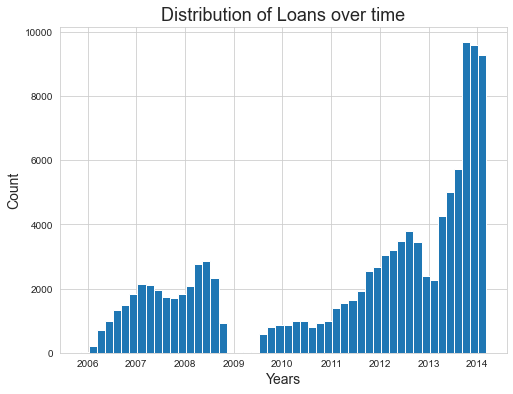

In [20]:
plt.figure(figsize=(8,6))
plt.hist(data=df,x='ListingCreationDate',bins=50);
plt.title('Distribution of Loans over time',fontdict={'fontsize':18});
plt.xlabel('Years',fontdict={'fontsize':14});
plt.ylabel('Count',fontdict={'fontsize':14});

## 2) Relation between Borrower Monthly Income and The Loan Amount

> Borrowers with Higher Monthly Income are more likely to get higher loans

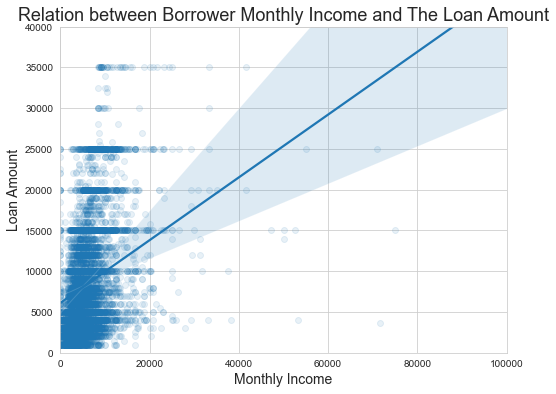

In [34]:
plt.figure(figsize=(8,6))
sns.regplot(data=df.sample(int(10e3)), x='StatedMonthlyIncome', y='LoanOriginalAmount',scatter_kws={'alpha':0.1})
plt.xlim((0,100000))
plt.ylim((0,40000))
#plt.xscale('log')
#plt.yscale('log')
plt.title("Relation between Borrower Monthly Income and The Loan Amount",fontdict={'fontsize':18});
plt.xlabel('Monthly Income',fontdict={'fontsize':14});
plt.ylabel('Loan Amount',fontdict={'fontsize':14});

## 3) Proportion of Loan statues for different income ranges

> It's clear that the higher is the Borrower's income range, The higher the chance of completing the loan payments

In [22]:
df['loan_status'] = df.LoanStatus.apply(lambda x: x.split()[0])

st_counts = df.query('loan_status !="Current"').groupby(['IncomeRange', 'loan_status']).size()/df.query('loan_status !="Current"').groupby(['IncomeRange']).size()
st_counts

# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
#st_counts = df.groupby(['IncomeRange', 'loan_status']).size()
#st_counts

# Use Series.reset_index() to convert a series into a dataframe object
st_counts = st_counts.reset_index(name='count')
st_counts

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
st_counts = st_counts.pivot(index = 'IncomeRange', columns = 'loan_status', values = 'count')
st_counts

loan_status,Cancelled,Chargedoff,Completed,Defaulted,FinalPaymentInProgress,Past
IncomeRange,,,,,,
Not displayed,0.000517,0.178272,0.595530,0.225681,0.000000,0.000000
Not employed,0.000000,0.326165,0.582437,0.044803,0.000000,0.046595
$0,0.000000,0.303279,0.606557,0.083607,0.000000,0.006557
"$1-24,999",0.000000,0.280498,0.613761,0.070494,0.002955,0.032292
"$25,000-49,999",0.000059,0.243663,0.637609,0.075523,0.002869,0.040279
"$50,000-74,999",0.000000,0.195981,0.690882,0.065054,0.004764,0.043320
"$75,000-99,999",0.000000,0.170134,0.725100,0.055334,0.003837,0.045595
"$100,000+",0.000000,0.150755,0.743498,0.050148,0.008098,0.047500


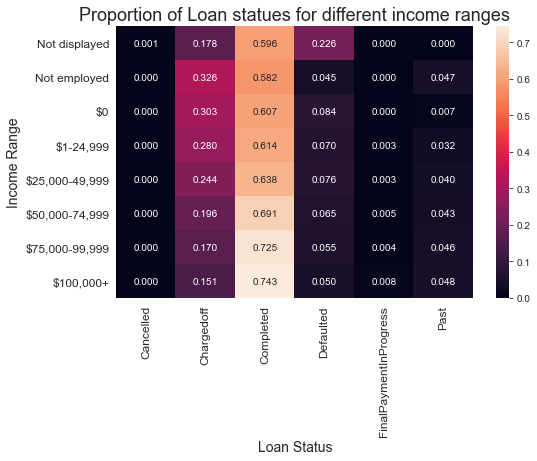

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(st_counts, annot = True,fmt='0.3f');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Loan Status',fontdict={'fontsize':14});
plt.ylabel('Income Range',fontdict={'fontsize':14});
plt.title("Proportion of Loan statues for different income ranges",fontdict={'fontsize':18});

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!